<ipython-input-78-a616b4527e18>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  fig, plt.pcolormesh(x,y,I, cmap='gray')


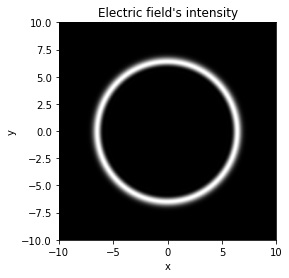

<ipython-input-78-a616b4527e18>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  fig, plt.pcolormesh(x,y,np.angle(E), cmap='gray')


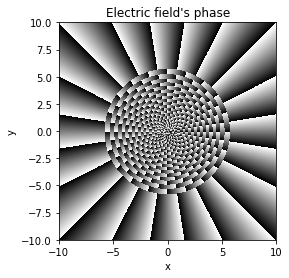

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.special import genlaguerre

# Define a function to polarize the electric field
def polarize(E, pol):
    if pol == "H":
        p = np.array([1, 0])
    elif pol == "V":
        p = np.array([0, 1])
    elif pol == "D":
        p = 1/np.sqrt(2) * np.array([1, 1])
    elif pol == "A":
        p = 1/np.sqrt(2) * np.array([1, -1])
    elif pol == "R":
        p = 1/np.sqrt(2) * np.array([1, -1j])
    elif pol == "L":
        p = 1/np.sqrt(2) * np.array([1, 1j])
    Ex = p[0] * E
    Ey = p[1] * E
    return Ex, Ey

# Set the parameters of the electric field
w = 1
m = 20
N = 2**10

# Create a meshgrid for the electric field
ranges = [-10, 10]
x, y = np.meshgrid(np.linspace(ranges[0], ranges[1], N), np.linspace(ranges[0], ranges[1], N))
r = np.sqrt(x**2 + y**2)
th = np.arctan2(y, x)

# Compute the electric field and its intensity
E = (r/w)**abs(m) * np.exp(-r**2/w**2) * np.exp(1j*m*th) * genlaguerre(m, 0)(2*r**2/w**2)
I = abs(E)**2

# Polarize the electric field
polarization = "R"
Ex, Ey = polarize(E, polarization)

# Create the figure and axis object and plot the intensity and phase of the electric field
fig, plt.pcolormesh(x, y, I, cmap='gray')
plt.title('Electric field\'s intensity'), plt.xlabel('x'), plt.ylabel('y')
plt.gca().set_aspect('equal'), plt.plot(), plt.show()

fig, plt.pcolormesh(x, y, np.angle(E), cmap='gray')
plt.title('Electric field\'s phase'), plt.xlabel('x'), plt.ylabel('y')
plt.gca().set_aspect('equal'), plt.plot(), plt.show()

# Create the quiver plot of the electric field's vector field
fig, ax = plt.subplots()
q = ax.quiver(x, y, np.real(Ex), np.real(Ey), color='white')
ax.set_title('Electric field\'s vector field'), ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_facecolor('black'), ax.set_aspect('equal')

# Create the animation of the electric field's vector field
def update(t):
    global polarization
    Ex_t, Ey_t = polarize(E, polarization)
    q.set_UVC(np.real(Ex_t*np.exp(1j*w*t)), np.real(Ey_t*np.exp(1j*w*t)))
    return q,

anim = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 50), interval=50, blit=True)
# Display the animation in the Jupyter notebook
HTML(anim.to_jshtml())
